<a href="https://colab.research.google.com/github/ibribr/DT8807/blob/master/IRIS_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import layers 
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import random

Input features:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
Target feature:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(150,)
(150, 4)
[40 40 40]
[10 10 10]
ytrain:
 [0 2 1 0 1 2 1 2 2 2 2 1 1 1 1 0 0 2 2 0 1 0 2 0 1 2 2 0 2 0 0 1 1 0 2 2 1
 1 2 1 0 1 0 2 0 0 2 0 0 0 0 1 2 1 0 2 1 2 0 2 0 1 2 0 1 1 2 1 1 2 0 0 0 2
 1 2 1 2 2 1 0 2 1 0 2 0 2 1 1 0 1 2 0 0 2 2 2 1 2 0 2 1 2 2 0 1 1 1 1 1 0
 2 1 1 0 0 0 0 1 0]
ytest:
 [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 1 1 0 2 0]
One hot encoding (ytrain):
 [[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1.

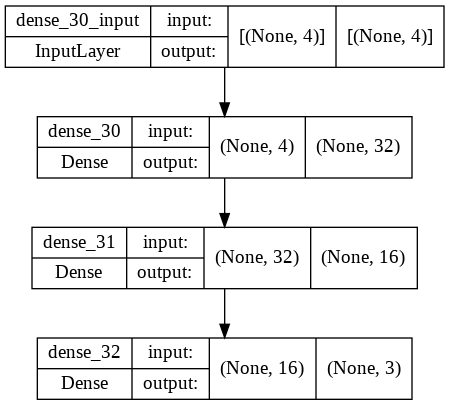

In [27]:
# seed the random generator for reproducibility
random.seed(42)

# load and preprocess you dataset
iris = load_iris()
x    = iris.data
y    = iris.target

print('Input features:\n', x[:10,:])
print('Target feature:\n',y)
print(y.shape)
print(x.shape)

scalar = MinMaxScaler()
xn = scalar.fit_transform(x)

xtrain, xtest, y_train, y_test = train_test_split(xn, y, test_size=0.2, random_state=42, stratify=y)
print(np.bincount(y_train))
print(np.bincount(y_test))

print('ytrain:\n', y_train)
print('ytest:\n', y_test)

ytrain = to_categorical(y_train)
ytest = to_categorical(y_test)
print('One hot encoding (ytrain):\n', ytrain[:10,:])

print('One hot encoding (ytest):\n', ytest[:10,:])


model = Sequential([
    layers.Dense(32, activation='relu', input_shape=[4]),
    layers.Dense(16, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy'])  #adam

# visualize your model
model.summary()
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [28]:
epochs = 200
history = model.fit(xtrain, ytrain, epochs=epochs, validation_split=0.1, batch_size=16, verbose=1)

Epoch 1/200
7/7 [==============================] - 1s 29ms/step - loss: 1.1053 - accuracy: 0.3889 - val_loss: 1.0523 - val_accuracy: 0.7500
Epoch 2/200
7/7 [==============================] - 0s 6ms/step - loss: 1.0702 - accuracy: 0.6389 - val_loss: 1.0388 - val_accuracy: 0.8333
Epoch 3/200
7/7 [==============================] - 0s 5ms/step - loss: 1.0406 - accuracy: 0.6481 - val_loss: 1.0325 - val_accuracy: 0.6667
Epoch 4/200
7/7 [==============================] - 0s 6ms/step - loss: 1.0116 - accuracy: 0.6574 - val_loss: 1.0205 - val_accuracy: 0.5833
Epoch 5/200
7/7 [==============================] - 0s 6ms/step - loss: 0.9870 - accuracy: 0.6667 - val_loss: 1.0060 - val_accuracy: 0.5833
Epoch 6/200
7/7 [==============================] - 0s 6ms/step - loss: 0.9586 - accuracy: 0.6667 - val_loss: 0.9812 - val_accuracy: 0.5833
Epoch 7/200
7/7 [==============================] - 0s 5ms/step - loss: 0.9300 - accuracy: 0.6667 - val_loss: 0.9553 - val_accuracy: 0.5833
Epoch 8/200
7/7 [=========

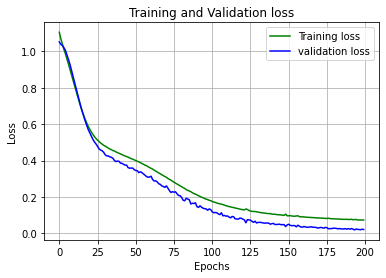

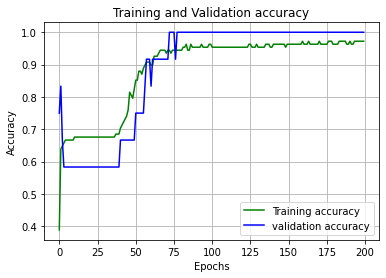

In [29]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(0,epochs)
plt.plot(epochs, train_loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [30]:
from sklearn.metrics import confusion_matrix
ypred=model.predict(xtest)
print(ypred[:10,:])
# convert outputs into one hot encoding
ypred= np.argmax(ypred, axis=1)  #.numpy()
print(ypred.shape)
print(ypred)
confusion_matrix(y_test, ypred)

[[9.9985158e-01 1.4819155e-04 1.9870816e-07]
 [1.2755266e-04 3.0758724e-01 6.9228518e-01]
 [1.2206875e-02 9.8601437e-01 1.7787374e-03]
 [6.4290781e-03 9.9168009e-01 1.8908972e-03]
 [9.9993145e-01 6.8476780e-05 7.8178218e-08]
 [3.3640783e-04 9.0391451e-01 9.5749088e-02]
 [9.9999022e-01 9.7638713e-06 6.6546009e-09]
 [9.9957806e-01 4.2182551e-04 1.1201409e-07]
 [8.6564978e-06 3.6189597e-02 9.6380180e-01]
 [1.0224859e-03 9.3969041e-01 5.9287012e-02]]
(30,)
[0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 1 2 2 1 0 2 0]


array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  9]])